<a href="https://colab.research.google.com/github/AyoubENOUIJAI/22007782-AyoubENOUIJAI/blob/main/22007782_AyoubENOUIJAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliothèques importées avec succès.

2. Chargement des données (Cleveland Heart Disease)...
   Données chargées. Taille du dataset : (303, 14)
   Classes : [0, 1] (0 = Cœur Sain, 1 = Maladie Cardiaque)
   Répartition : {1: 165, 0: 138}

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 195

4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Visualisation des données...


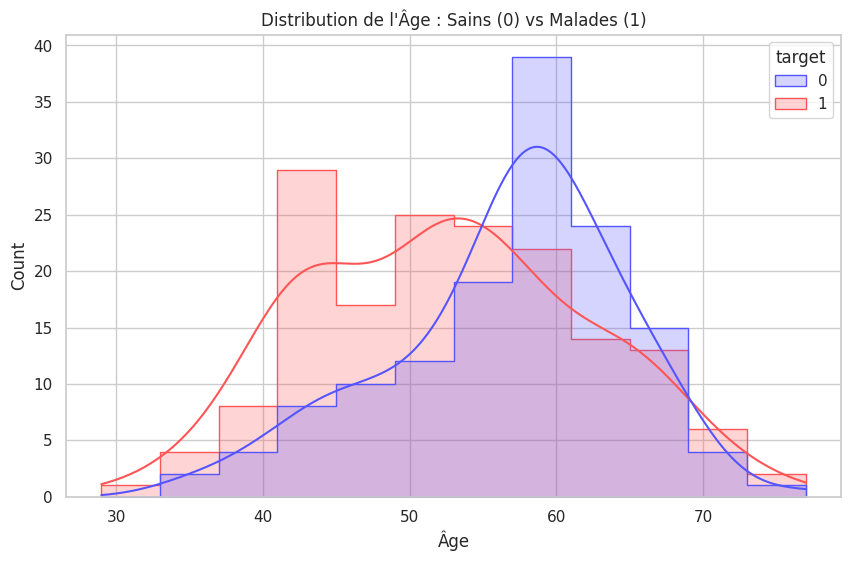

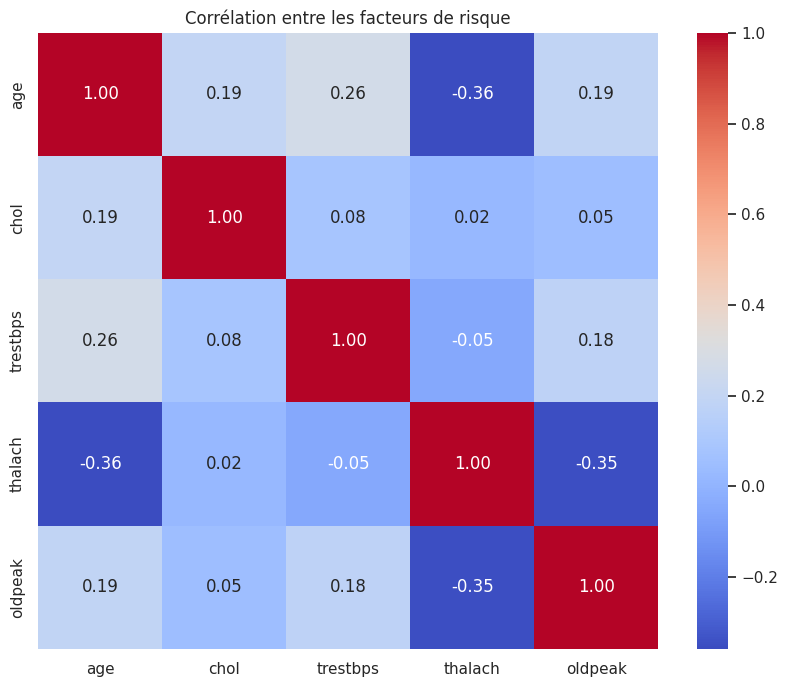

6. Séparation effectuée :
   Entraînement : 242 patients
   Test : 61 patients

7. Entraînement de l'IA (Random Forest)...
   Modèle entraîné avec succès.

8. Résultats et Diagnostic...
   >>> Précision Globale (Accuracy) : 83.61%

   >>> Rapport de Classification :
              precision    recall  f1-score   support

   Cœur Sain       0.81      0.86      0.83        29
     Maladie       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



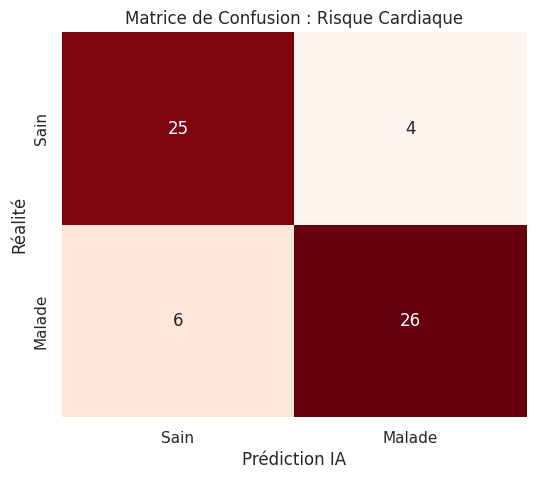


--- FIN DU SCRIPT ---


In [6]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# Sujet : Prédiction des Maladies Cardiaques (Heart Disease)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
# Note : On utilise fetch_openml pour récupérer le dataset "heart-disease"
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES (Heart Disease)
# ------------------------------------------------------------------------------
print("2. Chargement des données (Cleveland Heart Disease)...")

# Récupération du dataset via Scikit-Learn (version 1 = Cleveland database)
# Ce processus peut prendre quelques secondes selon la connexion
data = fetch_openml(name='heart-disease', version=1, as_frame=True)

# Création du DataFrame
df = data.frame

# --- ETAPE CRUCIALE : Ingénierie de la cible (Target Engineering) ---
# Le dataset original a une colonne cible qui note la maladie de 0 (sain) à 4 (très grave).
# Pour notre classification binaire, nous transformons tout ce qui est > 0 en 1.
# Colonne cible d'origine : 'target' (tel que fourni par fetch_openml v1 avec as_frame=True)
y_original = df['target'].astype(int)

# Création de notre colonne 'target' binaire (cela va surcharger la colonne existante)
# 0 = Sain (Absence de maladie)
# 1 = Malade (Présence de maladie, peu importe le stade 1, 2, 3 ou 4)
df['target'] = np.where(y_original > 0, 1, 0)

# On ne supprime pas l'ancienne colonne 'num' car elle n'est pas présente;
# la colonne 'target' a été directement modifiée pour être binaire.

print(f"   Données chargées. Taille du dataset : {df.shape}")
print(f"   Classes : [0, 1] (0 = Cœur Sain, 1 = Maladie Cardiaque)")
print(f"   Répartition : {df['target'].value_counts().to_dict()}\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
# Dans la vraie vie hospitalière, des dossiers sont incomplets.
# Nous allons introduire artificiellement des valeurs manquantes (NaN) dans 5% des données.
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42) # Pour la reproductibilité
mask = np.random.random(df.shape) < 0.05 # Masque de 5%

# On applique les NaN partout sauf sur la colonne 'target' (qu'on ne veut pas abîmer ici)
features_columns = df.columns[:-1]
df_dirty = df.copy()

for col in features_columns:
    # On injecte des NaN aléatoirement
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

# Séparation Features (X) et Target (y) AVANT le nettoyage
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Stratégie d'imputation :
# Pour des données médicales comme le cholestérol ou la tension,
# la moyenne est une stratégie standard pour boucher les trous.
imputer = SimpleImputer(strategy='mean')

# Apprentissage et transformation
X_imputed = imputer.fit_transform(X)

# On remet sous forme de DataFrame pour garder les noms de colonnes (plus propre)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")
# 5. ANALYSE EXPLORATOIRE (EDA)
# ------------------------------------------------------------------------------
print("5. Visualisation des données...")

# A. Histogramme de l'Âge
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, element="step", palette="seismic")
plt.title("Distribution de l'Âge : Sains (0) vs Malades (1)")
plt.xlabel("Âge")
plt.show()

# B. Matrice de Corrélation
plt.figure(figsize=(10, 8))
# On ne garde que quelques colonnes clés pour la lisibilité
cols_to_plot = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']
sns.heatmap(X_clean[cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les facteurs de risque")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION TRAIN / TEST
# ------------------------------------------------------------------------------
# On garde 20% des patients pour tester l'IA à la fin
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

print(f"6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} patients")
print(f"   Test : {X_test.shape[0]} patients\n")

# ------------------------------------------------------------------------------
# 7. ENTRAÎNEMENT DU MODÈLE (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement de l'IA (Random Forest)...")

# Création d'une "Forêt" de 100 arbres de décision
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Résultats et Diagnostic...")

y_pred = model.predict(X_test)

# A. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"   >>> Précision Globale (Accuracy) : {acc*100:.2f}%")

# B. Rapport Détaillé (Focus sur le Recall)
print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred, target_names=["Cœur Sain", "Maladie"]))

# C. Matrice de Confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=["Sain", "Malade"], yticklabels=["Sain", "Malade"])
plt.xlabel('Prédiction IA')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion : Risque Cardiaque')
plt.show()

print("\n--- FIN DU SCRIPT ---")